Importing the Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Importing the dataset

In [80]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [82]:
df.rename(columns={'EstimatedSalary': 'Estimated_Salary'}, inplace=True)

In [84]:
df.isnull().sum()

User ID             0
Gender              0
Age                 0
Estimated_Salary    0
Purchased           0
dtype: int64

In [86]:
X=df.drop(columns=['Purchased','Gender']).values
y=df[["Purchased"]].values


Splitting the dataset into the Training set and Test set

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature Scaling

In [92]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [94]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

D:\conda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [96]:
y_pred = classifier.predict(X_test)

In [109]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


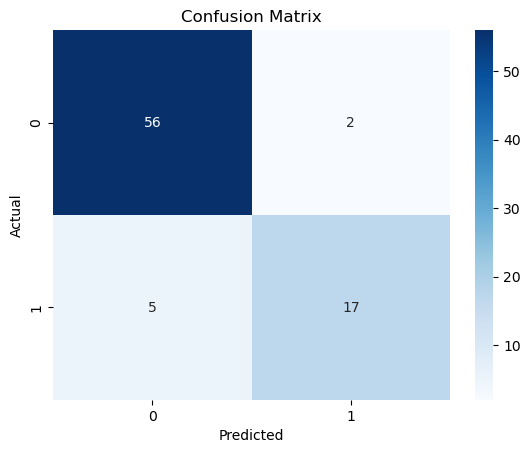

In [115]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()